## In this notebook 
#### + For one of the TGAS FITS files, convert RA, Dec, parallax into X,Y,Z (in parsecs).
#### + Make some plots that visualize this? 
#### + Trim the dataset to where parallax error is less than 20% of the parallax value.
#### + Create a new table containing x, y, z, and G magnitudes for your stars. (G magnitude is `phot_g_mean_mag`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi

import astropy.io.fits
import astropy.table

## Formulas

In [2]:
# distance measured in parcsecs. Star and its parallax angle relation  d=1/theta
#2x10**5 asrcseconds = 1 radian

def ParallaxToDistance(P):
    """
    This function converts the parallax of a group 
    of stars into their distance from Earth. 
    
    Parameters:
    ----------------------------------------------
    Array of the parallaxes of a group of stars in arcseconds
    
    Returns:
    ----------------------------------------------
    Array of the distannces from the Earth of a group of stars in AU
    """
    #Calculate distance in parseconds:
    distance = 1/P
    
    #convert to AU:
    distanceAU= (distance)*(360/(2*pi)*3600)
    
    return distanceAU

In [3]:
def toXYZ(RA,DEC,Distance): #,Parallax
    """
    This function converts RA, Dec and Distance into 
    X,Y and Z coordinates.
    
    Parameters:
    --------------------------------------------------
    RA = Array of the right ascencion of each star.
    DEC = Array of the declination of each star.
    Distance = Array of the distance from Earth of
            each star, in AU.
            
## Parallax: Array of the parallax of each star?
## oR should just leave it as distances and use the formula above?
idk  man


    Returns:
    ---------------------------------------------------
    X,Y,Z arrays of the x,y,z coordinates of all the
    stars included, in parsecs.
    
    """
    
    r=Distance*(np.cos(DEC))
    z=Distance*(np.sin(DEC))
    y=r*(np.sin(RA))
    x=r*(np.cos(RA))
    
    return x,y,z

In [4]:
def MagnitudeToFlux(M):
    """
    This function uses the visual magnitude of a group of star
    to find out their energy flux (power/area).
    
    Parameters: 
    -------------------
    M = numpy array of the magnitudes of a group of stars
    
    Returns: 
    -------------------
    Fluxes = numpy array of the fluxes each of the stars emits in units Flx 
    (Need flux and magnitude of another star to convert in SI units Watts/m^2 )
     
    """
    # Use magnitudes formula, need to use the flux of a Star with magnitude 0
    # this will make the formula return fluxes on that unit

    Fluxes = (10**(-M/2.5))
    
    return Fluxes

## Plots to visualize the data

In [5]:
hdu = astropy.io.fits.open("data/TgasSource_000-000-000.fits")

#Ask Zach what the number 1 means
table = astropy.table.Table(hdu[1].data)

table.colnames

['hip',
 'tycho2_id',
 'solution_id',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_good_obs_ac',
 'astrometric_n_bad_obs_al',
 'astrometric_n_bad_obs_ac',
 'astrometric_delta_q',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'astrometric_relegation_factor',
 'astrometric_weight_al',
 'astrometric_weight_ac',
 'astrometric_priors_used',
 'matched_observations',
 'duplicated_source',
 'scan_direction_strength_k1',
 'scan_direction_strength_k2',
 'scan_direction_strength_k3',
 'scan_direction_strength_k4',
 'scan_direction_mean_k1',


In [58]:
#From the table, pull out the data that we'll be working with

Gaia0Parallax = table['parallax'].data

#How to change the title of this table
Gaia0Distances = ParallaxToDistance(Gaia0Parallax)

Gaia0Dec = table['dec']
Gaia0RA = table['ra']
#Gaia0DecRadians = (table['dec'])*(pi/180)
#Gaia0RARadians = (table['ra'])*(pi/180)

Gaia0Magnitudes = table['phot_g_mean_mag']

#Which one should be used? 

Gaia0Fluxes = table['phot_g_mean_flux']
Gaia0FluxesFromFormula = MagnitudeToFlux(Gaia0Magnitudes)

print Gaia0Distances


[  32467.55945508   52883.95150279   65370.6278468  ...,  109378.08525027
   64727.75607337   89032.51698585]


In [59]:
Gaia0x,Gaia0y,Gaia0z = toXYZ(Gaia0RARadians,Gaia0DecRadians,Gaia0Distances)

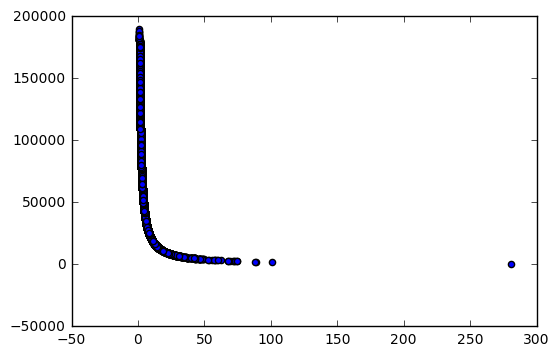

In [54]:
plt.scatter(Gaia0ParallaxET,Gaia0DistancesET)

In [8]:
print np.max(Gaia0x)
print np.min(Gaia0x)
print np.mean(Gaia0x)

#print Gaia0FluxesFromFormula

1516059828.24
-4950115866.91
-50288.8696203


### Make some plots to visualize the data

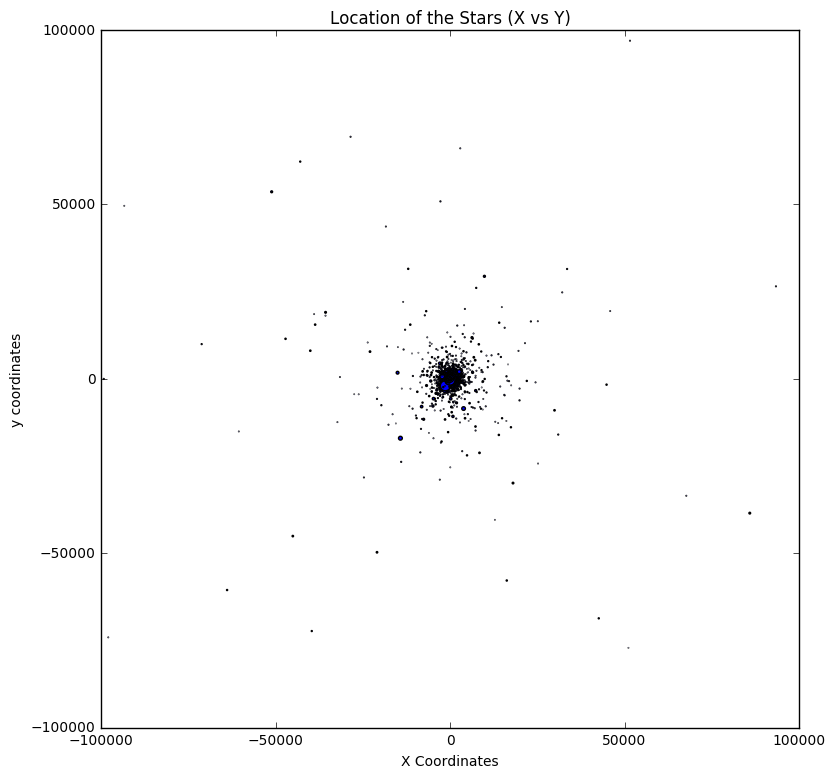

In [55]:
plt.figure(figsize=(9,9))
plt.scatter((Gaia0x/1000),(Gaia0y/1000),s=Gaia0FluxesFromFormula*10000)

plt.xlim(-100000,100000)
plt.ylim(-100000,100000)

plt.xlabel('X Coordinates')
plt.ylabel('y coordinates')

plt.title('Location of the Stars (X vs Y)')

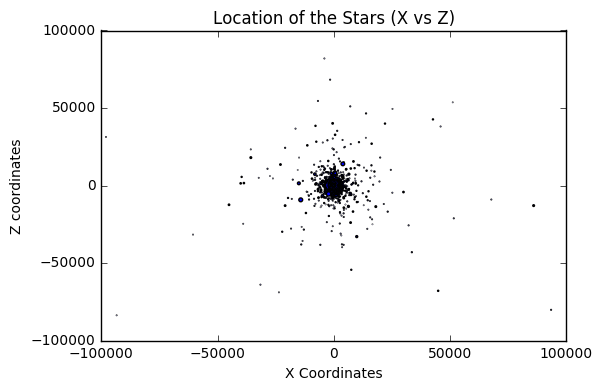

In [17]:
#plt.figure(figsize=(9,9))
plt.scatter((Gaia0x/1000),(Gaia0z/1000),s=Gaia0FluxesFromFormula*10000)

plt.xlim(-100000,100000)
plt.ylim(-100000,100000)

plt.xlabel('X Coordinates')
plt.ylabel('Z coordinates')
plt.title('Location of the Stars (X vs Z)')

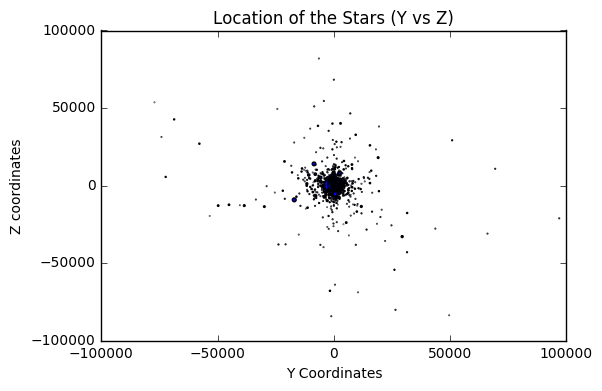

In [19]:
#plt.figure(figsize=(9,9))
plt.scatter((Gaia0y/1000),(Gaia0z/1000),s=Gaia0FluxesFromFormula*10000)

plt.xlim(-100000,100000)
plt.ylim(-100000,100000)

plt.xlabel('Y Coordinates')
plt.ylabel('Z coordinates')
plt.title('Location of the Stars (Y vs Z)')

## Plots after trimming the error

In [62]:
    
fraction = np.abs(table['parallax_error']/table['parallax'])
ok1 = fraction < 0.2
ok2 = table['parallax']>0
ok = ok1*ok2

# pull out those elements where ok is True
Gaia0ParallaxET = table['parallax'][ok]

#How to change the title of this table?
Gaia0DistancesET = ParallaxToDistance(Gaia0ParallaxET)

#changing to radians
Gaia0DecET = (table['dec'][ok])*(pi/180)
Gaia0RAET = (table['ra'][ok])*(pi/180)

Gaia0MagnitudesET = table['phot_g_mean_mag'][ok]

#Which one should be used? 

Gaia0FluxesET = table['phot_g_mean_flux'][ok]
Gaia0FluxesFromFormulaET = MagnitudeToFlux(Gaia0MagnitudesET)

Gaia0xET,Gaia0yET,Gaia0zET = toXYZ(Gaia0RAET,Gaia0DecET,Gaia0DistancesET)

(-1.5707963267948966, 1.5707963267948966)

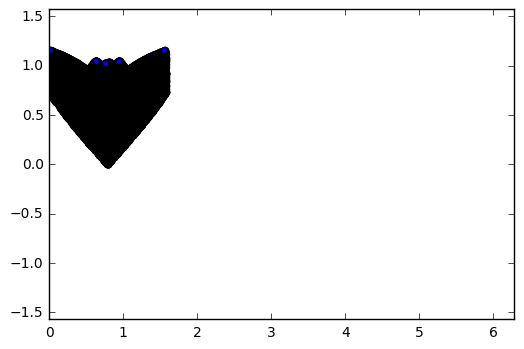

In [66]:
plt.scatter(Gaia0RAET,Gaia0DecET)
plt.xlim(0,2*pi)
plt.ylim(-pi/2,pi/2)

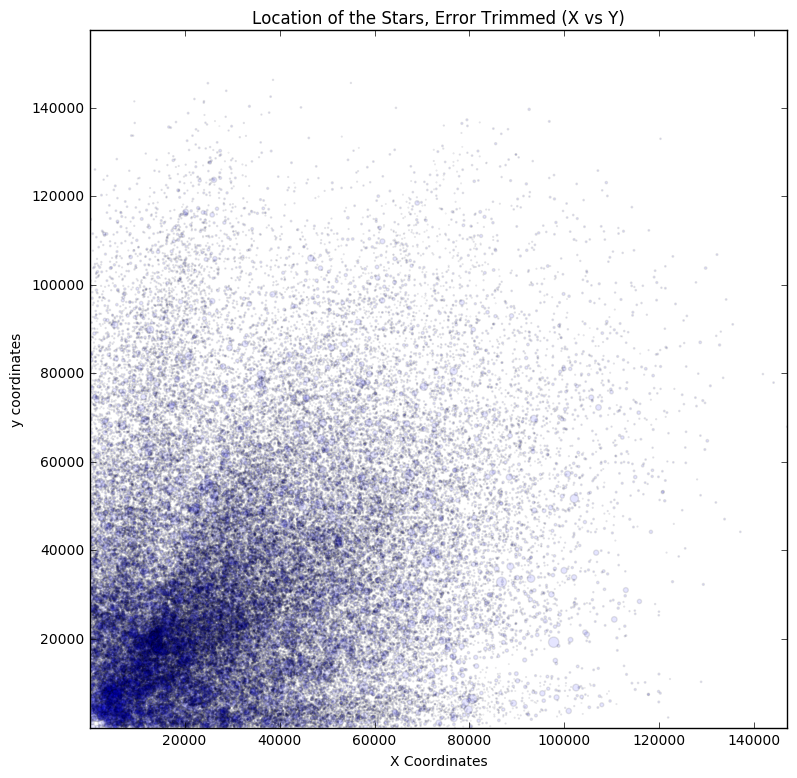

In [63]:
plt.figure(figsize=(9,9))
plt.scatter((Gaia0xET),(Gaia0yET),s=Gaia0FluxesET/1000000,alpha=0.1)

plt.xlim(np.min(Gaia0xET),np.max(Gaia0xET))
plt.ylim(np.min(Gaia0yET),np.max(Gaia0yET))

#plt.xlim(-100000,100000)
#plt.ylim(-100000,100000)

plt.xlabel('X Coordinates')
plt.ylabel('y coordinates')

plt.title('Location of the Stars, Error Trimmed (X vs Y)')

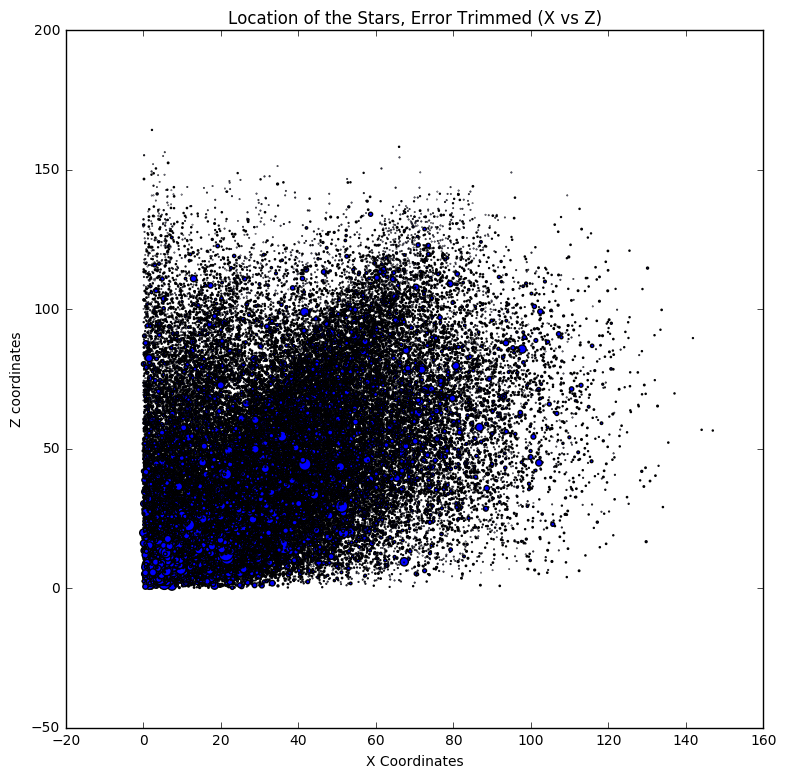

In [64]:
plt.figure(figsize=(9,9))
plt.scatter((Gaia0xET/1000),(Gaia0zET/1000),s=Gaia0FluxesFromFormulaET*10000)


#plt.xlim(np.min(Gaia0xET),np.max(Gaia0xET))
#plt.ylim(np.min(Gaia0yET),np.max(Gaia0yET))

plt.xlabel('X Coordinates')
plt.ylabel('Z coordinates')
plt.title('Location of the Stars, Error Trimmed (X vs Z)')

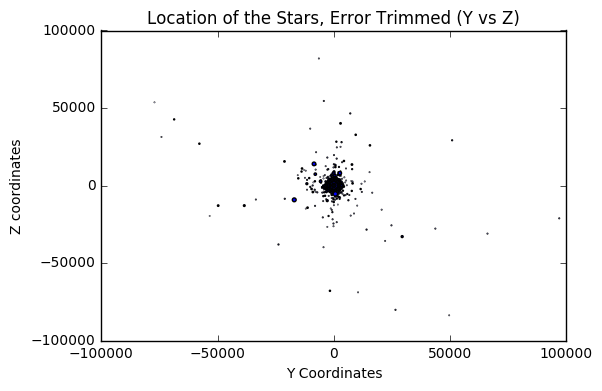

In [25]:
#plt.figure(figsize=(9,9))
plt.scatter((Gaia0yET/1000),(Gaia0zET/1000),s=Gaia0FluxesFromFormulaET*10000)

plt.xlim(-100000,100000)
plt.ylim(-100000,100000)

plt.xlabel('Y Coordinates')
plt.ylabel('Z coordinates')
plt.title('Location of the Stars, Error Trimmed (Y vs Z)')

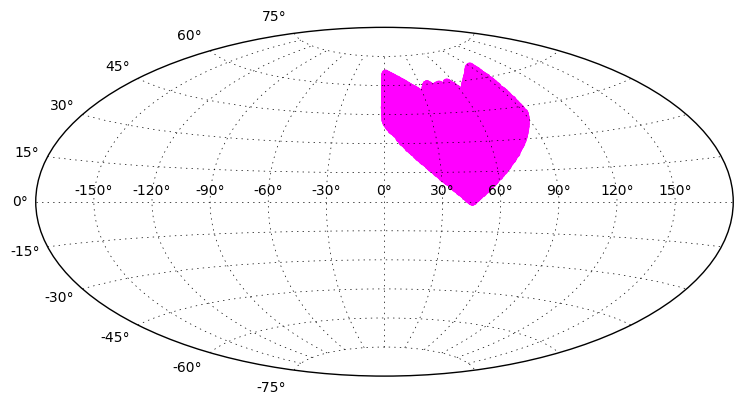

In [70]:
plt.figure(figsize=(9,9))
plt.subplot(111, projection="aitoff")
plt.scatter(Gaia0RAET,Gaia0DecET,color='magenta')

plt.grid(True)

In [36]:
from ipywidgets import PrettyTable
import pandas as pd
data = pd.DataFrame({"x":[Gaia0xET], "y":[Gaia0yET], "z":["Gaia0zET"],"Magnitude":[Gaia0MagnitudesET]})
TableFinal = PrettyTable(data)


ImportError: cannot import name PrettyTable